In [7]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

### Loading the Dataset

In [8]:
df = pd.read_csv(r'\Users\AIDL-LAB\Desktop\Dashan\train.csv', encoding='utf-8')
df

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...
...,...,...,...
93681,Online Financial Fraud,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDeb...
93682,Online Financial Fraud,EWallet Related Fraud,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...
93683,Online Financial Fraud,UPI Related Frauds,Cyber Stalking Blackmailing PhoneSMSVOIP C...
93684,Online and Social Media Related Crime,Online Matrimonial Fraud,Call karke bola ki aapka lotary laga ha aru AC...


In [9]:
df_test  = pd.read_csv(r'\Users\AIDL-LAB\Desktop\Dashan\test.csv', encoding='utf-8')
df_test

,category,sub_category,crimeaditionalinfo
0,RapeGang Rape RGRSexually Abusive Content,NaN,Sir namaskar mein Ranjit Kumar PatraPaise neh...
1,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT
2,Cyber Attack/ Dependent Crimes,SQL Injection,The issue actually started when I got this ema...
3,Online Financial Fraud,Fraud CallVishing,I am amit kumar from karwi chitrakoot I am tot...
4,Any Other Cyber Crime,Other,I have ordered saree and blouse from rinki s...
...,...,...,...
31224,Online and Social Media Related Crime,Online Matrimonial Fraud,A lady named Rashmi probably a fake name had c...
31225,Online Financial Fraud,Internet Banking Related Fraud,I am Mr Chokhe Ram Two pers mobile number wer...
31226,Any Other Cyber Crime,Other,Mai Bibekbraj maine pahle ki complain kar chuk...
31227,Online Financial Fraud,Internet Banking Related Fraud,received URL link for updating KYC from mobile...


In [10]:
df.shape

(93686, 3)

In [11]:
df.sample(10)

,category,sub_category,crimeaditionalinfo
15880,Online Financial Fraud,UPI Related Frauds,FRAUD THROUGH UPI Fraud GOOGLE PE \t\t \r\...
50989,Online Financial Fraud,UPI Related Frauds,\r\nFRAUD THROUGH PHONE PE UPI RELATED FRAU...
38362,Any Other Cyber Crime,Other,I lost amount through online fraud
55280,Online Financial Fraud,UPI Related Frauds,FRAUD THROUGH UPI PAYTM \r\nBANK UNION BANK \r...
4411,Any Other Cyber Crime,Other,I got a call on that you will be given a Jio ...
64806,Online and Social Media Related Crime,Intimidating Email,This man waquar azam mirza has been trying to ...
89320,Online Financial Fraud,UPI Related Frauds,Sir hamko KNC CHAIN CO Ne murkh banakar paisa...
67617,Cyber Attack/ Dependent Crimes,Malware Attack,I never imagined something like this could hap...
26722,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,FRAUD THROUGH DEBIT CARD MASTER CARD \r\nBAN...
19210,Online Financial Fraud,UPI Related Frauds,FRAUD THROUGH BHIM UPI \r\n\r\n BANK STATE B...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31229 entries, 0 to 31228
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            31229 non-null  object
 1   sub_category        28993 non-null  object
 2   crimeaditionalinfo  31222 non-null  object
dtypes: object(3)
memory usage: 732.1+ KB


In [14]:
df.isnull().sum()

category                 0
sub_category          6591
crimeaditionalinfo      21
dtype: int64

In [15]:
df_test.isnull().sum()

category                 0
sub_category          2236
crimeaditionalinfo       7
dtype: int64

In [16]:
df = df.dropna(subset=['crimeaditionalinfo'])
df_test = df_test.dropna(subset=['crimeaditionalinfo'])

In [17]:
df.describe()

,category,sub_category,crimeaditionalinfo
count,93665,87074,93665
unique,15,35,85013
top,Online Financial Fraud,UPI Related Frauds,Respected Sir\r\n\r\nA very serious matter I w...
freq,57416,26843,2342


### Exploratory Data Analysis

In [18]:
df[df.duplicated()].sample(10)

,category,sub_category,crimeaditionalinfo
31008,Online Financial Fraud,UPI Related Frauds,Online financial fraud
49852,Online Financial Fraud,UPI Related Frauds,UPI fraud
53200,Online Financial Fraud,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDeb...
60262,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...
22838,Online Financial Fraud,UPI Related Frauds,FINACIAL FRAUD
8925,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...
59525,Online Financial Fraud,UPI Related Frauds,financial fraud
70329,Online Financial Fraud,UPI Related Frauds,Financial Fraud
70948,RapeGang Rape RGRSexually Abusive Content,NaN,Respected Sir\r\n\r\nA very serious matter I w...
15895,Online Financial Fraud,UPI Related Frauds,FINANCIALS FRAUD \r\n


In [19]:
df = df.drop_duplicates()
df_test = df_test.drop_duplicates()

In [20]:
df

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...
...,...,...,...
93681,Online Financial Fraud,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDeb...
93682,Online Financial Fraud,EWallet Related Fraud,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...
93683,Online Financial Fraud,UPI Related Frauds,Cyber Stalking Blackmailing PhoneSMSVOIP C...
93684,Online and Social Media Related Crime,Online Matrimonial Fraud,Call karke bola ki aapka lotary laga ha aru AC...


In [21]:
df['category'].value_counts()

category
Online Financial Fraud                                  52496
Online and Social Media Related Crime                   12076
Any Other Cyber Crime                                   10811
Cyber Attack/ Dependent Crimes                           3608
Sexually Obscene material                                1764
Hacking  Damage to computercomputer system etc           1709
Sexually Explicit Act                                    1489
Cryptocurrency Crime                                      473
Online Gambling  Betting                                  444
Child Pornography CPChild Sexual Abuse Material CSAM      357
RapeGang Rape RGRSexually Abusive Content                 248
Online Cyber Trafficking                                  183
Cyber Terrorism                                           161
Ransomware                                                 56
Report Unlawful Content                                     1
Name: count, dtype: int64

In [22]:
df['sub_category'].value_counts()

sub_category
UPI Related Frauds                                                      23526
Other                                                                   10811
DebitCredit Card FraudSim Swap Fraud                                    10044
Internet Banking Related Fraud                                           8096
Fraud CallVishing                                                        5780
Cyber Bullying  Stalking  Sexting                                        4051
EWallet Related Fraud                                                    4008
FakeImpersonating Profile                                                2289
Profile Hacking Identity Theft                                           2070
Cheating by Impersonation                                                1980
Unauthorised AccessData Breach                                           1113
Online Job Fraud                                                          911
DematDepository Fraud                              

<Axes: xlabel='count', ylabel='category'>

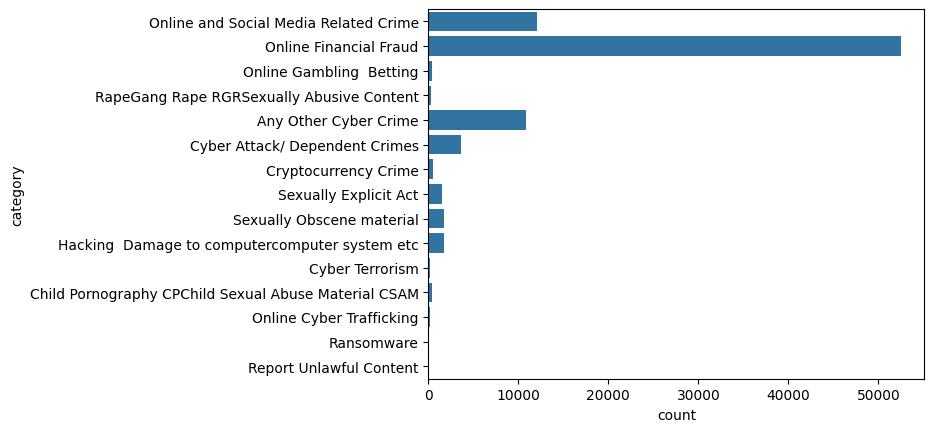

In [23]:
sns.countplot(df['category'])

<Axes: xlabel='count', ylabel='sub_category'>

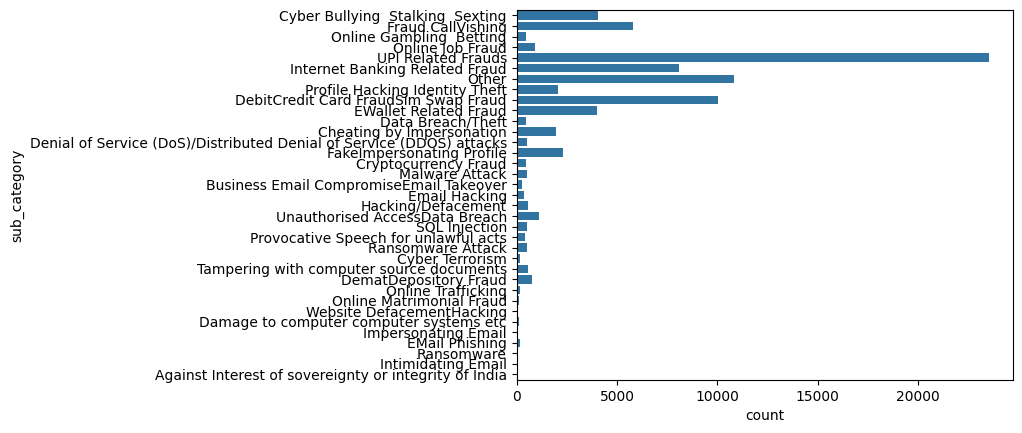

In [24]:
sns.countplot(df['sub_category'])

<Axes: ylabel='count'>

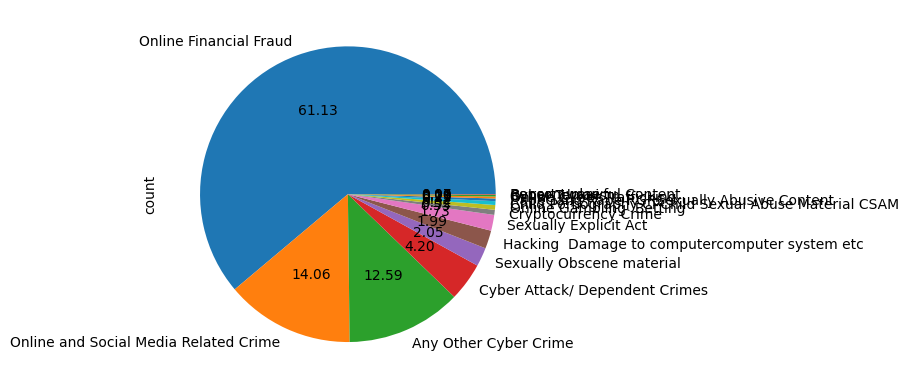

In [25]:
df['category'].value_counts().plot(kind='pie',autopct="%.2f")

<Axes: ylabel='count'>

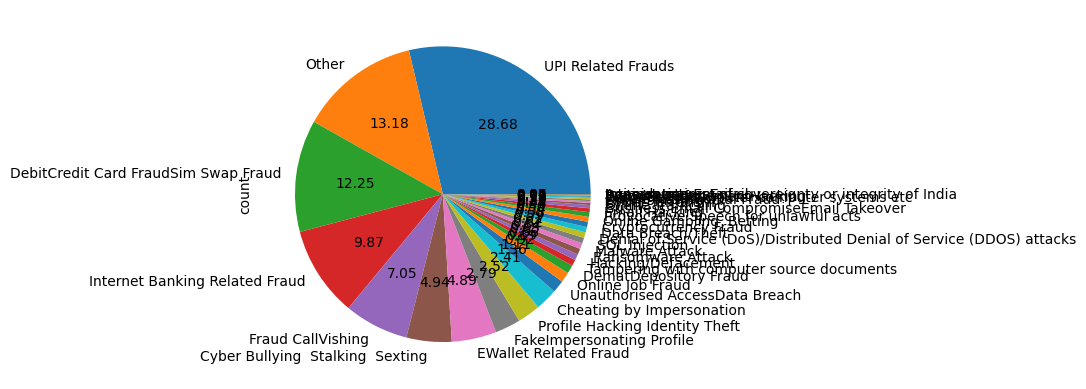

In [26]:
df['sub_category'].value_counts().plot(kind='pie',autopct="%.2f")

In [27]:
pd.crosstab(df['category'],df['sub_category'])

sub_category,Against Interest of sovereignty or integrity of India,Business Email CompromiseEmail Takeover,Cheating by Impersonation,Cryptocurrency Fraud,Cyber Bullying Stalking Sexting,Cyber Terrorism,Damage to computer computer systems etc,Data Breach/Theft,DebitCredit Card FraudSim Swap Fraud,DematDepository Fraud,Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks,EMail Phishing,EWallet Related Fraud,Email Hacking,FakeImpersonating Profile,Fraud CallVishing,Hacking/Defacement,Impersonating Email,Internet Banking Related Fraud,Intimidating Email,Malware Attack,Online Gambling Betting,Online Job Fraud,Online Matrimonial Fraud,Online Trafficking,Other,Profile Hacking Identity Theft,Provocative Speech for unlawful acts,Ransomware,Ransomware Attack,SQL Injection,Tampering with computer source documents,UPI Related Frauds,Unauthorised AccessData Breach,Website DefacementHacking
category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Any Other Cyber Crime,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10811,0,0,0,0,0,0,0,0,0
Cryptocurrency Crime,0,0,0,473,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cyber Attack/ Dependent Crimes,0,0,0,0,0,0,0,484,0,0,504,0,0,0,0,0,540,0,0,0,521,0,0,0,0,0,0,0,0,534,508,517,0,0,0
Cyber Terrorism,0,0,0,0,0,161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Hacking Damage to computercomputer system etc,0,0,0,0,0,0,108,0,0,0,0,0,0,349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,0,1113,89
Online Cyber Trafficking,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183,0,0,0,0,0,0,0,0,0,0
Online Financial Fraud,0,290,0,0,0,0,0,0,10044,752,0,0,4008,0,0,5780,0,0,8096,0,0,0,0,0,0,0,0,0,0,0,0,0,23526,0,0
Online Gambling Betting,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,444,0,0,0,0,0,0,0,0,0,0,0,0,0
Online and Social Media Related Crime,0,0,1980,0,4051,0,0,0,0,0,0,157,0,0,2289,0,0,44,0,29,0,0,911,132,0,0,2070,413,0,0,0,0,0,0,0


<Axes: xlabel='sub_category', ylabel='category'>

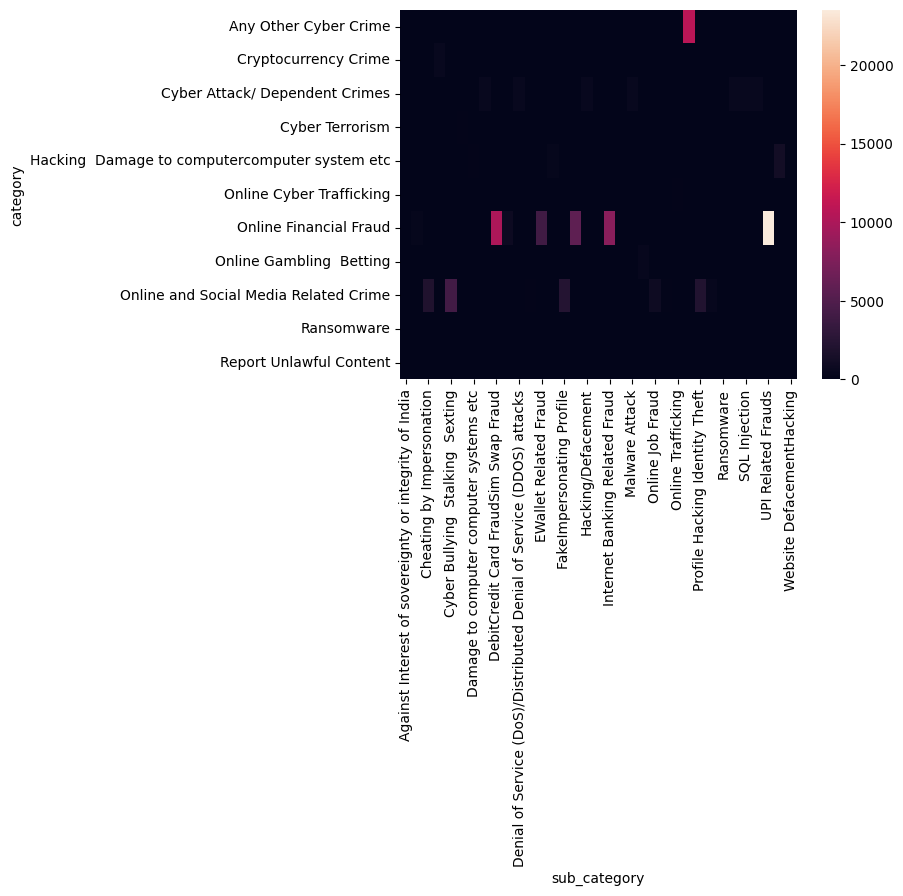

In [28]:
sns.heatmap(pd.crosstab(df['category'],df['sub_category']))

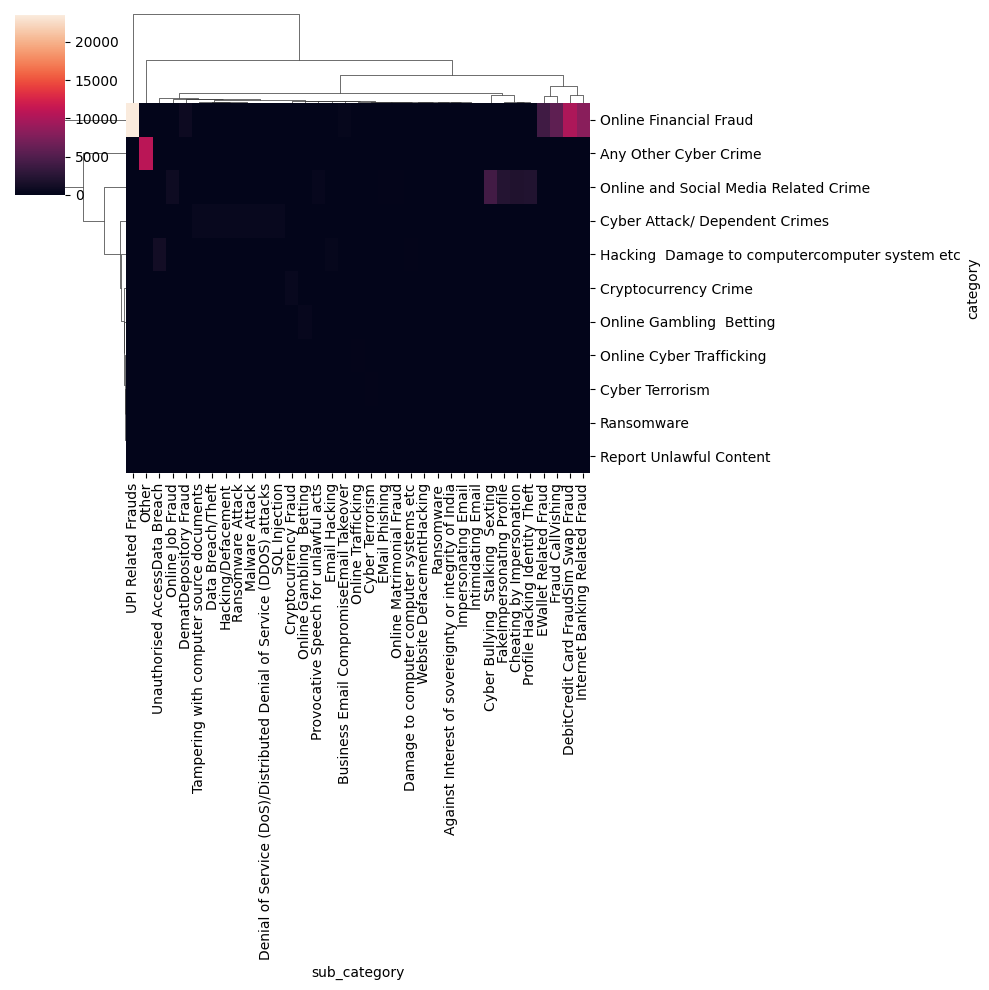

In [29]:
sns.clustermap(pd.crosstab(df['category'],df['sub_category']))

In [30]:
df = pd.concat([df,df_test],axis=0)
df

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...
...,...,...,...
31224,Online and Social Media Related Crime,Online Matrimonial Fraud,A lady named Rashmi probably a fake name had c...
31225,Online Financial Fraud,Internet Banking Related Fraud,I am Mr Chokhe Ram Two pers mobile number wer...
31226,Any Other Cyber Crime,Other,Mai Bibekbraj maine pahle ki complain kar chuk...
31227,Online Financial Fraud,Internet Banking Related Fraud,received URL link for updating KYC from mobile...


### Data Pre Processing

 Data Cleaning & Categorization 

In [31]:
def categorize(row):
    category_lower = row['category'].lower()

    if category_lower in ['rapegang rape rgrsexually abusive content','child pornography cpchild sexual abuse material csam','sexually obscene material','sexually explicit act','cyber bullying stalking sexting']:
        return "Women/Child Related Crime"

    elif category_lower in ['online financial fraud']:
        return "Financial Fraud Crimes"

    else:
        return "Other Cyber Crime"

df['new_category'] = df.apply(categorize, axis=1)
df[['category','new_category','crimeaditionalinfo','sub_category']].sample(10)

,category,new_category,crimeaditionalinfo,sub_category
43678,Online Financial Fraud,Financial Fraud Crimes,I have received a message on through mobile n...,UPI Related Frauds
26606,Cryptocurrency Crime,Other Cyber Crime,I join the company by online mode they asked f...,Cryptocurrency Fraud
83085,Online and Social Media Related Crime,Other Cyber Crime,My Facebook id has been hacked by someone h is...,Profile Hacking Identity Theft
12407,Any Other Cyber Crime,Other Cyber Crime,Online fraud in the name of iPhone,Other
41956,Online Financial Fraud,Financial Fraud Crimes,UPI FRAUD RS through PhonePe app by asking to...,UPI Related Frauds
13542,Online Financial Fraud,Financial Fraud Crimes,FRAUD THROUGH GOOGLE PAY\r\nBANK INDIAN BANK\...,UPI Related Frauds
16657,Online Financial Fraud,Financial Fraud Crimes,Identity theft Fake Customer Care Service Fr...,DebitCredit Card FraudSim Swap Fraud
90356,Online Financial Fraud,Financial Fraud Crimes,FRAUD THROUGH UPI GOOGLE PAY\r\nBANK PUNJAB NA...,UPI Related Frauds
35499,Online Financial Fraud,Financial Fraud Crimes,sir company valo ne mujhe bola ki apko form m...,Fraud CallVishing
39069,Online and Social Media Related Crime,Other Cyber Crime,Dear sirMadam\r\nI am living in Tiruppur with ...,Profile Hacking Identity Theft


In [32]:
df['new_category'].value_counts()

new_category
Financial Fraud Crimes       70114
Other Cyber Crime            39592
Women/Child Related Crime     5241
Name: count, dtype: int64

### Sampling

In [33]:
def resample_data(df, undersample_threshold=44000, oversample_threshold=39592):

    resampled_dfs = []  

 
    counts = df['new_category'].value_counts()

    for sub_cat, count in counts.items():
        sub_cat_data = df[df['new_category'] == sub_cat]

        if count > undersample_threshold:
            undersampled_data = sub_cat_data.sample(undersample_threshold, random_state=42)
            resampled_dfs.append(undersampled_data)
        elif count < oversample_threshold:
            oversampled_data = sub_cat_data.sample(oversample_threshold, replace=True, random_state=42)
            resampled_dfs.append(oversampled_data)
        else:
            resampled_dfs.append(sub_cat_data)

    balanced_df = pd.concat(resampled_dfs, ignore_index=True)
    return balanced_df

balanced_df = resample_data(df)


In [34]:
balanced_df['new_category'].value_counts()
df = balanced_df

In [35]:
#
print("Balanced Dataset:")
print(balanced_df)

# Print the counts of each sub_category in the balanced dataset
balanced_class_counts = balanced_df['sub_category'].value_counts()
print("\nBalanced Class Counts:")
print(balanced_class_counts)


Balanced Dataset:
                         category  ...               new_category
0          Online Financial Fraud  ...     Financial Fraud Crimes
1          Online Financial Fraud  ...     Financial Fraud Crimes
2          Online Financial Fraud  ...     Financial Fraud Crimes
3          Online Financial Fraud  ...     Financial Fraud Crimes
4          Online Financial Fraud  ...     Financial Fraud Crimes
...                           ...  ...                        ...
123179      Sexually Explicit Act  ...  Women/Child Related Crime
123180      Sexually Explicit Act  ...  Women/Child Related Crime
123181  Sexually Obscene material  ...  Women/Child Related Crime
123182  Sexually Obscene material  ...  Women/Child Related Crime
123183  Sexually Obscene material  ...  Women/Child Related Crime

[123184 rows x 4 columns]

Balanced Class Counts:
sub_category
UPI Related Frauds                                                      19793
Other                                           

### Stopword Removal

In [36]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\AIDL-
[nltk_data]     LAB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
def load_custom_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return {line.strip().lower() for line in f}

# Assuming _df is your DataFrame and stopwords.txt contains your custom stopwords
stopwords_file_path = 'C:/Users/AIDL-LAB/Desktop/Dashan/stopwords.txt'

custom_stopwords = load_custom_stopwords(stopwords_file_path)

# Combine NLTK stopwords with custom stopwords
english_stopwords = set(stopwords.words('english')).union(custom_stopwords)

# Preprocess the DataFrame
df['category'] = df['category'].str.lower()
df['sub_category'] = df['sub_category'].str.lower()
df['new_category'] = df['new_category'].str.lower()

# Clean the crimeaditionalinfo column
df['cleaned_text'] = df['crimeaditionalinfo'].str.lower()
df['cleaned_text'] = df['cleaned_text'].str.replace(r'\r\n', ' ', regex=True)
df['cleaned_text'] = df['cleaned_text'].str.strip()

# Remove stopwords using the combined set
df['cleaned_text'] = df['cleaned_text'].apply(
    lambda sentence: ' '.join(word for word in str(sentence).split() if word not in english_stopwords)
)


In [38]:
NON_ALPHANUMERIC_PATTERN = re.compile(r'[^a-zA-Z0-9\s]')
MULTIPLE_SPACES_PATTERN = re.compile(r'\s+')

def normalize_text(text):
    if not isinstance(text, str):
        return ''
    text = NON_ALPHANUMERIC_PATTERN.sub('', text)
    return MULTIPLE_SPACES_PATTERN.sub(' ', text).strip()

df['cleaned_text'] = df['cleaned_text'].apply(normalize_text)
df

,category,sub_category,crimeaditionalinfo,new_category,cleaned_text
0,online financial fraud,fraud callvishing,Iam searching for a instant loan in this OB ca...,financial fraud crimes,iam searching instant loan ob cash loan app wi...
1,online financial fraud,upi related frauds,Online Frauds Loan Fraud Vishing Smishing P...,financial fraud crimes,online frauds loan fraud vishing smishing phon...
2,online financial fraud,upi related frauds,Online Frauds Gift Fraud phone pay \r\n vi...,financial fraud crimes,online frauds gift fraud phone pay victim got ...
3,online financial fraud,upi related frauds,Caller informed me that they are from amazonin...,financial fraud crimes,caller informed amazonin got prize get voucher...
4,online financial fraud,upi related frauds,FRAUD THROUGH UPI PHONE PE \r\nBANK Punjab ...,financial fraud crimes,fraud upi phone bank punjab national bank incl...
...,...,...,...,...,...
123179,sexually explicit act,NaN,The person befriended on facebook and asked fo...,women/child related crime,person befriended facebook asked number talk p...
123180,sexually explicit act,NaN,Blackmailing from the number to publish a obs...,women/child related crime,blackmailing number publish obscene video mine...
123181,sexually obscene material,NaN,This unknow person is troubling me and my daug...,women/child related crime,unknow person troubling daughter sending dirty...
123182,sexually obscene material,NaN,Is ladki ka poora account aisi hi videos se bh...,women/child related crime,ladki poora account hi videos bhra hua h bacch...


In [39]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np
from torch.optim import AdamW as TorchAdamW 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch.nn.functional as F

### Labeling

In [40]:
df.loc[:, 'label'] = df['new_category'].astype('category').cat.codes
df.groupby('new_category').describe()

label                                   
                             count mean  std  min  25%  50%  75%  max
new_category                                                         
financial fraud crimes     44000.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
other cyber crime          39592.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
women/child related crime  39592.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0

In [37]:
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

### Importing BERT model for Fine Tuning

In [38]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(df['label'].unique()))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Setting Hyperparameters

In [39]:
MAX_LEN = 256
BATCH_SIZE = 16
LEARNING_RATE = 2e-5
EPOCHS = 3

In [40]:
texts = df['cleaned_text'].tolist() 
labels = df['label'].tolist()
from torch.optim import AdamW

In [4]:

train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.25, random_state=42
)

train_dataset = TextDataset(train_texts, train_labels, tokenizer, MAX_LEN)
val_dataset = TextDataset(val_texts, val_labels, tokenizer, MAX_LEN)

train_loader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=BATCH_SIZE)
val_loader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=BATCH_SIZE)

optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=0.01)
total_steps = len(train_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=int(0.1 * total_steps), num_training_steps=total_steps)

NameError: name 'texts' is not defined

### Loss Function

In [50]:
def train_epoch(model, data_loader, optimizer, scheduler, device):
    model.train()
    losses = []
    correct_predictions = 0

    for batch in tqdm(data_loader, desc="Training"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    accuracy = correct_predictions.double() / len(data_loader.dataset)
    average_loss = np.mean(losses)

    return {'accuracy': accuracy, 'loss': average_loss}


### Setting Cuda :GTX 1080 Ti as device for fine Tuning 

In [51]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [52]:
def eval_model(model, data_loader, device):
    model.eval()
    val_accuracy = []
    predictions, true_labels = [], []

    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            _, preds = torch.max(logits, dim=1)
            predictions.extend(preds)
            true_labels.extend(labels)

    predictions = torch.stack(predictions).cpu().numpy()
    true_labels = torch.stack(true_labels).cpu().numpy()
    return accuracy_score(true_labels, predictions), f1_score(true_labels, predictions, average='weighted')

### Model Evaluation and Accuracy, precision, recall, f1_score

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, data_loader, device):
    model.eval()
    predictions, true_labels = [], []
    total_loss = 0

    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            loss = F.cross_entropy(logits, labels)
            total_loss += loss.item()

            _, preds = torch.max(logits, dim=1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(data_loader)

    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')

    print("Evaluation Metrics:")
    print(f"Loss: {avg_loss:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return {
        'loss': avg_loss,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

#metrics = evaluate_model(model, test_loader, device)


### Training Loop

In [ ]:
best_accuracy = 0

for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch + 1}/{EPOCHS}")
 
    train_metrics = train_epoch(model, train_loader, optimizer, scheduler, device)
    train_loss = train_metrics['loss']
    train_accuracy = train_metrics['accuracy']
   
    val_metrics = evaluate_model(model, val_loader, device)
    val_loss = val_metrics['loss']
    val_accuracy = val_metrics['accuracy']
    val_f1 = val_metrics['f1_score']
    val_precision =val_metrics['precision']
    val_recall = val_metrics['recall']
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}, Val F1 Score: {val_f1:.4f}")

    if val_accuracy > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state_category2.bin')
        best_accuracy = val_accuracy

print("Training complete.")



Epoch 1/3


Training:   0%|          | 0/5775 [00:00<?, ?it/s]

### Validation

In [ ]:
evaluate_model(model, val_loader, device)

Evaluating: 100%|██████████| 1540/1540 [04:48<00:00,  5.33it/s]


Evaluation Metrics:
Loss: 0.4025
Accuracy: 0.8417
Precision: 0.8386
Recall: 0.8417
F1 Score: 0.8389


{'loss': 0.40248565482634857,
 'accuracy': 0.8417420952226327,
 'precision': 0.8385716085637339,
 'recall': 0.8417420952226327,
 'f1_score': 0.8388920838280969}

In [48]:
best_accuracy = 0

for epoch in range(EPOCHS):
    print(f"Epoch {epoch + 1}/{EPOCHS}")
   
    train_acc, train_loss = train_epoch(model, train_loader, optimizer, scheduler, device)
   
    val_acc, val_f1 = eval_model(model, val_loader, device)
   
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
    print(f"Val Accuracy: {val_acc:.4f}, Val F1 Score: {val_f1:.4f}")
   
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state_category.bin')
        best_accuracy = val_acc

print("Training complete.")

Epoch 1/3


Training:   1%|          | 40/4620 [00:20<39:36,  1.93it/s]


KeyboardInterrupt: 

In [ ]:
model.load_state_dict(torch.load('best_model_state_category.bin'))
model = model.to(device)

C:\Users\AIDL-LAB\AppData\Local\Temp\ipykernel_11660\2611626795.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_state_catego

In [ ]:
val_acc, val_f1 = eval_model(model, val_loader, device)
print(f"Test Accuracy: {val_acc:.4f}, Test F1 Score: {val_f1:.4f}")

Evaluating: 100%|██████████| 694/694 [02:37<00:00,  4.40it/s]


Test Accuracy: 0.8625, Test F1 Score: 0.8601


In [ ]:
torch.save(model, 'complete_model_category.pth')